In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
import zipfile
import pandas as pd
import os

# Import the dataset

In [3]:
import zipfile
import os

csv_path = r"C:\Users\prath\Documents\my personal information\OneDrive\Desktop\resume_screening\Resume_Screening\UpdatedResumeDataSet.csv"
print("CSV file path:", csv_path)


CSV file path: C:\Users\prath\Documents\my personal information\OneDrive\Desktop\resume_screening\Resume_Screening\UpdatedResumeDataSet.csv


In [64]:
import pandas as pd

# Read the CSV file directly
df = pd.read_csv(csv_path)
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


## viewing the resume

In [66]:
df.shape

(962, 2)

In [67]:
df['Resume'][2]

'Areas of Interest Deep Learning, Control System Design, Programming in-Python, Electric Machinery, Web Development, Analytics Technical Activities q Hindustan Aeronautics Limited, Bangalore - For 4 weeks under the guidance of Mr. Satish, Senior Engineer in the hangar of Mirage 2000 fighter aircraft Technical Skills Programming Matlab, Python and Java, LabView, Python WebFrameWork-Django, Flask, LTSPICE-intermediate Languages and and MIPOWER-intermediate, Github (GitBash), Jupyter Notebook, Xampp, MySQL-Basics, Python Software Packages Interpreters-Anaconda, Python2, Python3, Pycharm, Java IDE-Eclipse Operating Systems Windows, Ubuntu, Debian-Kali Linux Education Details \r\nJanuary 2019 B.Tech. Electrical and Electronics Engineering  Manipal Institute of Technology\r\nJanuary 2015    DEEKSHA CENTER\r\nJanuary 2013    Little Flower Public School\r\nAugust 2000    Manipal Academy of Higher\r\nDATA SCIENCE \r\n\r\nDATA SCIENCE AND ELECTRICAL ENTHUSIAST\r\nSkill Details \r\nData Analysis-

In [68]:
print(df.isnull().sum())
print("--------------")
print(df.info())

Category    0
Resume      0
dtype: int64
--------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB
None


## Viewing the unique words from description of Resume

In [69]:
print(df['Category'].unique())

['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [70]:
print(df['Category'].value_counts())

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64


## merging all the description of Resumes

In [71]:
resumes = df['Resume'].tolist()
for i in range(5):
    print(f"\n Resume {i+1}:\n")
    print(df['Resume'][i])



 Resume 1:

Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details 

Data Science Assurance Associate 

Data Science Assurance Associate - Ernst & Young LLP
Skill Details 
JAVASCRIPT- Exprience - 24 months
jQuery- Exprience - 24 months
Python- Exprience - 24 monthsCompany Details 
company - Ernst & Young LLP
description - Fraud Investigations and Dispute Ser

## Data Visulization for the Unique words

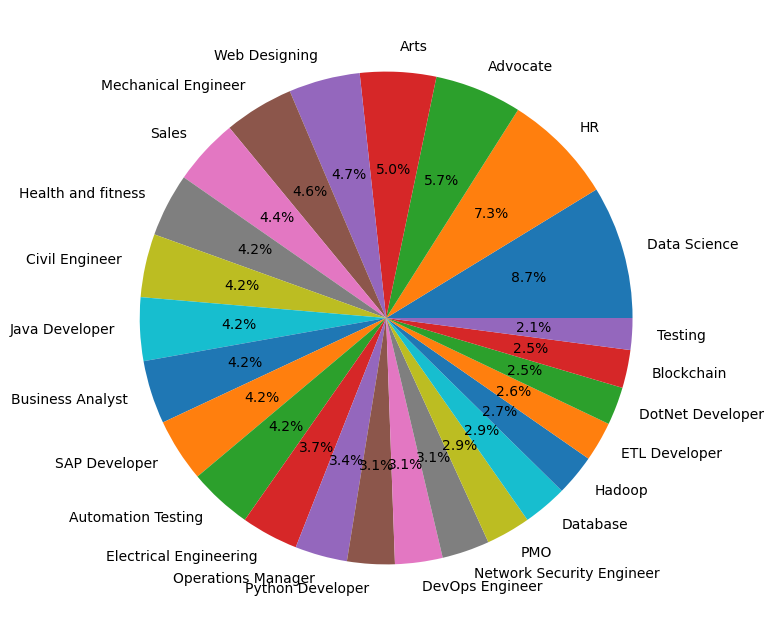

In [72]:
plt.figure(figsize=(10,8))
plt.pie(df['Category'].value_counts(),labels=df['Category'].unique(),autopct="%1.1f%%")
plt.show()

## Using plotly to figure out most people have this skilled

In [73]:
import plotly.express as px
import plotly.graph_objects as go
plot_data = pd.DataFrame({
    'Category': df['Category'].value_counts().index,
    'Count': df['Category'].value_counts().values
})
fig = px.bar(df, x='Category', y='Count',
             color='Category', 
             labels={'Category': 'Job', 'Count': 'Count'},
             color_discrete_sequence=px.colors.qualitative.Set3)

fig.update_layout(
    title='Count of a particular Job',
    xaxis_title='Job Role',
    yaxis_title='Count',
    legend_title='Job Categories',
    showlegend=True,
    xaxis=dict(tickangle=-30),
    font=dict(family='Photina', size=10, color='DarkBlue'),
    paper_bgcolor='LightSteelBlue'
)

fig.show()

ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['Category', 'Resume'] but received: Count

## Cleaning part

In [ ]:
import re

In [ ]:
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [74]:
## lowering the data
df['Cleaned_Resume']=df['Resume'].apply(lambda x:x.lower())

In [75]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\prath\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [76]:
resumes = df['Cleaned_Resume'].tolist()
tokenized_resumes = [word_tokenize(resume) for resume in resumes]
print(tokenized_resumes[0])


['skills', '*', 'programming', 'languages', ':', 'python', '(', 'pandas', ',', 'numpy', ',', 'scipy', ',', 'scikit-learn', ',', 'matplotlib', ')', ',', 'sql', ',', 'java', ',', 'javascript/jquery', '.', '*', 'machine', 'learning', ':', 'regression', ',', 'svm', ',', 'naã¯ve', 'bayes', ',', 'knn', ',', 'random', 'forest', ',', 'decision', 'trees', ',', 'boosting', 'techniques', ',', 'cluster', 'analysis', ',', 'word', 'embedding', ',', 'sentiment', 'analysis', ',', 'natural', 'language', 'processing', ',', 'dimensionality', 'reduction', ',', 'topic', 'modelling', '(', 'lda', ',', 'nmf', ')', ',', 'pca', '&', 'neural', 'nets', '.', '*', 'database', 'visualizations', ':', 'mysql', ',', 'sqlserver', ',', 'cassandra', ',', 'hbase', ',', 'elasticsearch', 'd3.js', ',', 'dc.js', ',', 'plotly', ',', 'kibana', ',', 'matplotlib', ',', 'ggplot', ',', 'tableau', '.', '*', 'others', ':', 'regular', 'expression', ',', 'html', ',', 'css', ',', 'angular', '6', ',', 'logstash', ',', 'kafka', ',', 'pytho

In [39]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prath\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

using porterstemmer we can reduces the words to their base form or root form 
for example running,runs,ran it will treats all forms of “run” as the same word, making it easier for models to analyze text. 

In [77]:
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

In [78]:
def clean_resume(resume):
    resume = re.sub(r'[^a-z\s]', '', resume)
    tokens = word_tokenize(resume)
    tokens = [ps.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['Cleaned_Resume'] = df['Cleaned_Resume'].apply(clean_resume)

In [79]:
df['Resume']

0      Skills * Programming Languages: Python (pandas...
1      Education Details \r\nMay 2013 to May 2017 B.E...
2      Areas of Interest Deep Learning, Control Syste...
3      Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4      Education Details \r\n MCA   YMCAUST,  Faridab...
                             ...                        
957    Computer Skills: â¢ Proficient in MS office (...
958    â Willingness to accept the challenges. â ...
959    PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960    COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961    Skill Set OS Windows XP/7/8/8.1/10 Database MY...
Name: Resume, Length: 962, dtype: object

In [80]:

df.head()

,Category,Resume,Cleaned_Resume
0,Data Science,Skills * Programming Languages: Python (pandas...,skill program languag python panda numpi scipi...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,educ detail may may uitrgpv data scientist dat...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learn control system design...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill r python sap hana tableau sap hana sql s...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",educ detail mca ymcaust faridabad haryana data...


In [44]:
import string
!pip install wordcloud
from wordcloud import WordCloud

Defaulting to user installation because normal site-packages is not writeable
  Using cached wordcloud-1.9.4-cp312-cp312-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.4-cp312-cp312-win_amd64.whl (301 kB)


In [81]:
filtered_words = []

resumes = df['Cleaned_Resume']
#you can use 
# resumes = df['Cleaned_Resume'].values[:150] # only 150 resumes only--- IGNORE ---
for resume in resumes:
    # cleaned_text = clean_resume(resume)  
    tokens = word_tokenize(resume)
    for word in tokens:
        if word not in stop_words and word not in string.punctuation:
            filtered_words.append(word)

how_much_time_word_come= nltk.FreqDist(filtered_words)
most_common=how_much_time_word_come.most_common(40)
print(most_common)

[('project', 3939), ('exprienc', 3829), ('compani', 3635), ('manag', 3596), ('develop', 3497), ('month', 3339), ('detail', 3237), ('descript', 3130), ('test', 2656), ('work', 2387), ('team', 2141), ('data', 2137), ('skill', 2070), ('system', 1918), ('use', 1884), ('engin', 1836), ('requir', 1698), ('respons', 1645), ('report', 1634), ('databas', 1527), ('year', 1503), ('maharashtra', 1449), ('client', 1443), ('design', 1423), ('applic', 1393), ('oper', 1392), ('technolog', 1379), ('servic', 1378), ('process', 1371), ('custom', 1324), ('busi', 1277), ('server', 1180), ('less', 1145), ('ltd', 1128), ('januari', 1090), ('provid', 1068), ('pune', 1025), ('product', 1021), ('java', 1015), ('sql', 974)]


In [ ]:

# def cleanResume(text):
#     text = text.lower()
#     text = re.sub(r'[^a-zA-Z\s]', '', text)
#     return text

# filtered_words = []
# resumes = df['Resume'].values[:160]

# for resume in resumes:
#     cleaned_text = cleanResume(resume)
#     tokens = word_tokenize(cleaned_text)
#     for word in tokens:
#         if word not in stop_words and word not in string.punctuation:
#             filtered_words.append(word)
            
# all_words = ' '.join(filtered_words)

# wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='Set2').generate(all_words)


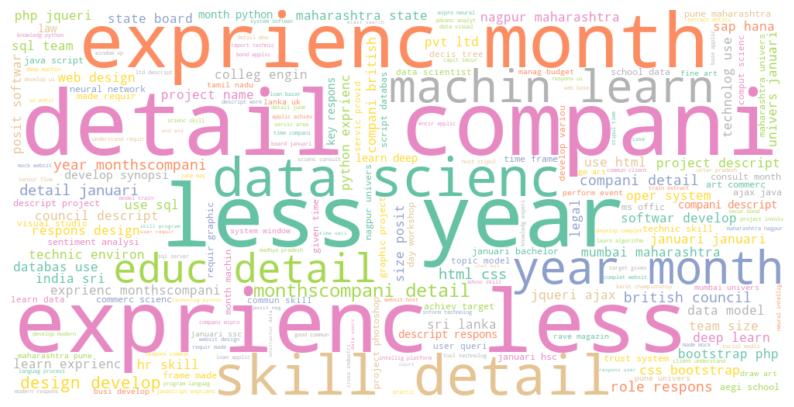

In [ ]:
# plt.figure(figsize=(10,7))
# plt.imshow(wordcloud,interpolation ='bilinear')
# plt.axis("off")
# plt.show()

In [82]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['Label_Category'] = le.fit_transform(df['Category'])
df.head()

,Category,Resume,Cleaned_Resume,Label_Category
0,Data Science,Skills * Programming Languages: Python (pandas...,skill program languag python panda numpi scipi...,6
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,educ detail may may uitrgpv data scientist dat...,6
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learn control system design...,6
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill r python sap hana tableau sap hana sql s...,6
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",educ detail mca ymcaust faridabad haryana data...,6


In [ ]:
# import plotly.express as px
# fig = px.pie(df,x=df['Category'],y=how_much_time_word_come,title='Category Distribution')

TypeError: pie() got an unexpected keyword argument 'x'

## forming vectorization 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words='english')

tfidf.fit(df['Cleaned_Resume'])
text=tfidf.transform(df['Resume'])

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text, df['Category'], test_size=0.2, random_state=42)


In [29]:
X_train.shape


(769, 5531)

In [30]:
X_test.shape


(193, 5531)

## training 

In [31]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [32]:
OVR=OneVsRestClassifier(SVC())
OVR.fit(X_train,y_train)
y_pred=OVR.predict(X_test)

In [33]:
print(f"Accuracy:{accuracy_score(y_test,y_pred):.4f}")

Accuracy:0.9948


In [36]:
print("Confusion_matrix:\n", confusion_matrix(y_test, y_pred))


Confusion_matrix:
 [[ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

models = {
    "SVM": OneVsRestClassifier(SVC()),
    "Logistic": OneVsRestClassifier(LogisticRegression(max_iter=1000)),
    "Random Forest": OneVsRestClassifier(RandomForestClassifier()),
    "Naive Bayes": OneVsRestClassifier(MultinomialNB())
}

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, pred):.4f}")


SVM Accuracy: 0.9948
Logistic Accuracy: 0.9948
Random Forest Accuracy: 0.9948
Naive Bayes Accuracy: 0.9948


In [40]:
svc_model = OneVsRestClassifier(SVC())
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
print("\nSVC Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_svc)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_svc)}")


SVC Results:
Accuracy: 0.9948
Confusion Matrix:
[[ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0 

## Pickle File 

In [35]:
import pickle 
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(OVR,open('clf.pickle','wb'))
pickle.dump(le,open('enocder.pkl','wb'))

In [41]:
# Function to predict the category of a resume
def pred(input_resume):
    # Preprocess the input text (e.g., cleaning, etc.)
    cleaned_text = cleanResume(input_resume) 

    # Vectorize the cleaned text using the same TF-IDF vectorizer used during training
    vectorized_text = tfidf.transform([cleaned_text])
    
    # Convert sparse matrix to dense
    vectorized_text = vectorized_text.toarray()

    # Prediction
    predicted_category = svc_model.predict(vectorized_text)

    # get name of predicted category
    predicted_category_name = le.inverse_transform(predicted_category)

    return predicted_category_name[0]  # Return the category name

In [42]:
myresume = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""

pred(myresume)

'Data Science'